In [1]:
%%javascript
if($(IPython.toolbar.selector.concat(' > #kill-run-all')).length == 0){
  IPython.toolbar.add_buttons_group([
        {
             'label'   : 'kill and run-all',
             'icon'    : 'fa fa-angle-double-down',
             'callback': function(){
                 IPython.notebook.kernel.restart();
                 $(IPython.events).one('kernel_ready.Kernel',
                                       function(){IPython.notebook.execute_all_cells();});
             }
        }
    ], 'kill-run-all');
}

<IPython.core.display.Javascript object>

In [2]:
import seaborn as sns
from foof.util import create_psd
%matplotlib inline

In [19]:
# stim induced
%run ../bin/ei.py ../data/test/ \
    -t 1 --stim 0.75 --rate 30 \
    --I_e 0.0 --I_i 0.8 --I_i_sigma 0.0 --I_e_sigma 0.0 \
    --w_e 0.5 --w_ee 0.1 --w_ii 0.5 \
    --w_ei .3 --w_ie 1.2 --stdp

Starting simulation for duration 1. s
85.18 ms (8%) simulated in 10s, estimated 1m 47s remaining.
169.71 ms (16%) simulated in 20s, estimated 1m 38s remaining.
258.65 ms (25%) simulated in 30s, estimated 1m 26s remaining.
0.33947 s (33%) simulated in 40s, estimated 1m 18s remaining.
0.43133 s (43%) simulated in 50s, estimated 1m 6s remaining.
0.52095 s (52%) simulated in 1m 0s, estimated 55s remaining.
0.61226 s (61%) simulated in 1m 10s, estimated 44s remaining.
0.69299 s (69%) simulated in 1m 20s, estimated 35s remaining.
0.78293 s (78%) simulated in 1m 30s, estimated 25s remaining.
0.87119 s (87%) simulated in 1m 40s, estimated 15s remaining.
0.95861 s (95%) simulated in 1m 50s, estimated 5s remaining.
1. s (100%) simulated in 1m 54s


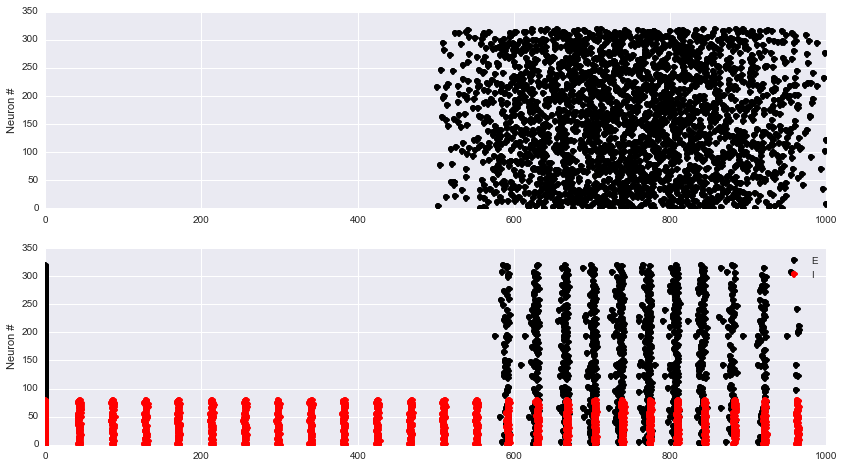

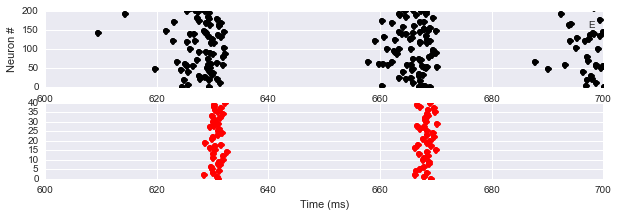

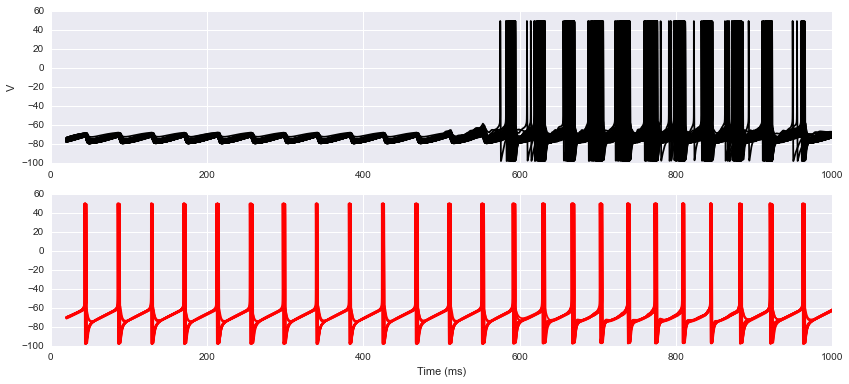

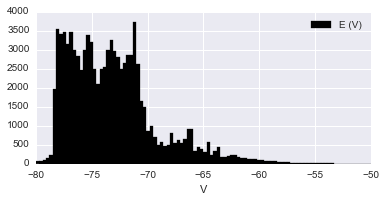

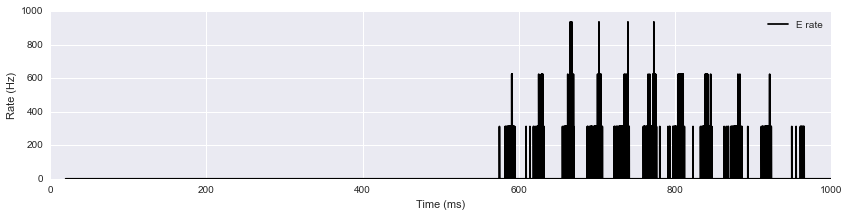

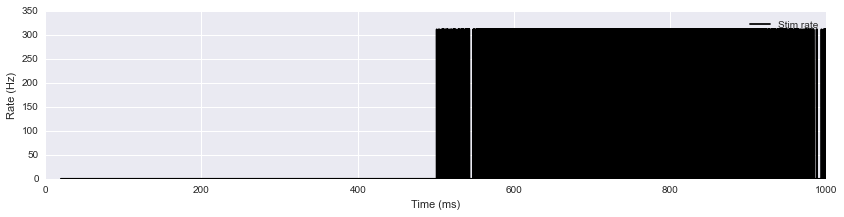

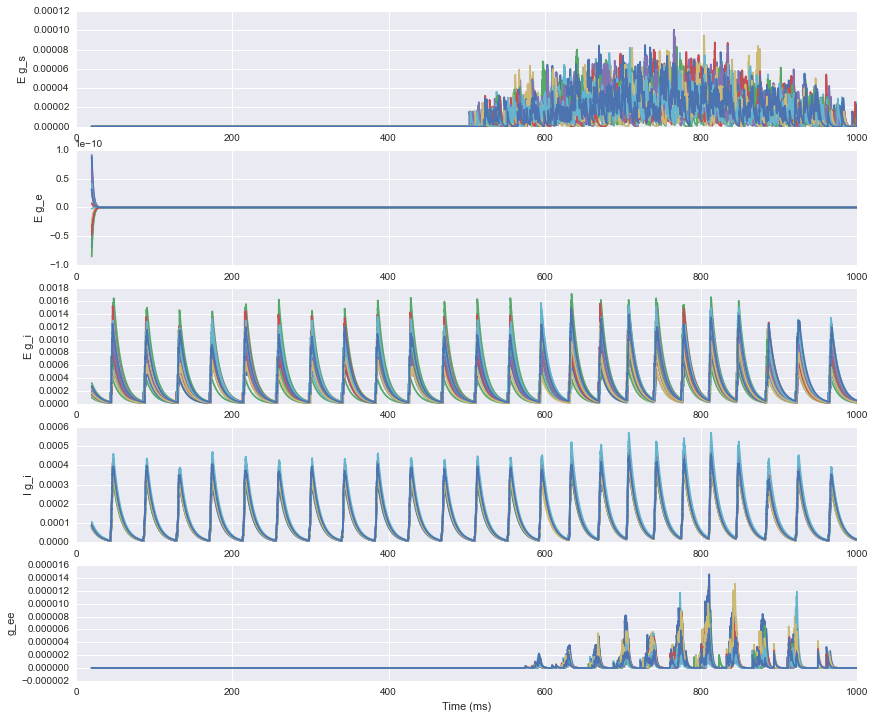

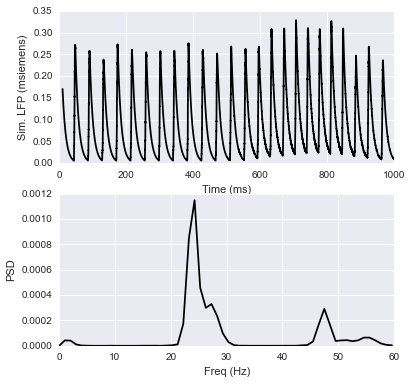

In [20]:
# Unpack
spikes_e = result['spikes_e']
spikes_stim = result['spikes_stim']
spikes_i = result['spikes_i']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
voltages_e = result['voltages_e']
voltages_i = result['voltages_i']
t = 2000

# ------------------------------------------------------------
# Raster full
figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(0,1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlim(0,1000)
ylabel("Neuron #")
legend()


# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(600,700)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(600,700)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(voltages_e.t[tn:]/ms, voltages_e.V[:, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(voltages_i.t[tn:]/ms, voltages_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(voltages_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(511)
plot(voltages_e.t[tn:]/ms, voltages_e.g_s[1:20, tn:].T, label='E (g_s)')
ylabel("E g_s")

subplot(512)
plot(voltages_e.t[tn:]/ms, voltages_e.g_e[1:20, tn:].T, label='E (g_e)')
ylabel("E g_e")

subplot(513)
plot(voltages_e.t[tn:]/ms, voltages_e.g_i[1:20, tn:].T, label='E (g_i)')
ylabel("E g_i")

subplot(514)
plot(voltages_i.t[tn:]/ms, voltages_i.g_i[1:20, tn:].T, label='I (g_i)')
ylabel("I g_i")
# legend(loc='best')

subplot(515)
plot(voltages_e.t[tn:]/ms, voltages_e.g_ee[1:20, tn:].T, label='E (g_ee)')
ylabel("g_ee")
xlabel("Time (ms)")

# ------------------------------------------------------------
# Spectra
lfp = (np.abs(voltages_e.g_s.sum(0)) + np.abs(voltages_e.g_ee.sum(0)) + np.abs(voltages_e.g_i.sum(0)))
lfp = lfp[1000:]  # Drop initial spike

figure(figsize=(6,6))
subplot(211)
plot(voltages_i.t[1000:]/ms, lfp, color='k',  label='LFP')
xlabel("Time (ms)")
ylabel("Sim. LFP (msiemens)")

subplot(212)
fs, spec = create_psd(lfp, 100000)
plot(fs[:60], spec[:60], color='k')
xlabel("Freq (Hz)") 
ylabel("PSD")

# 